Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import CubicSpline , CubicHermiteSpline


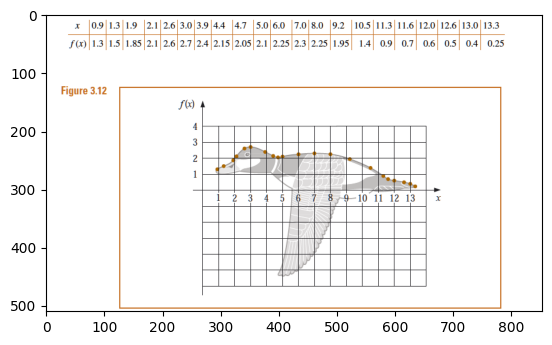

In [ ]:
# Representacion grafica de la imagen
path = "/content/Fig.png"
img = cv2.imread(path)
plt.imshow(img)

In [ ]:
# creacion de la lista x,y
x = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

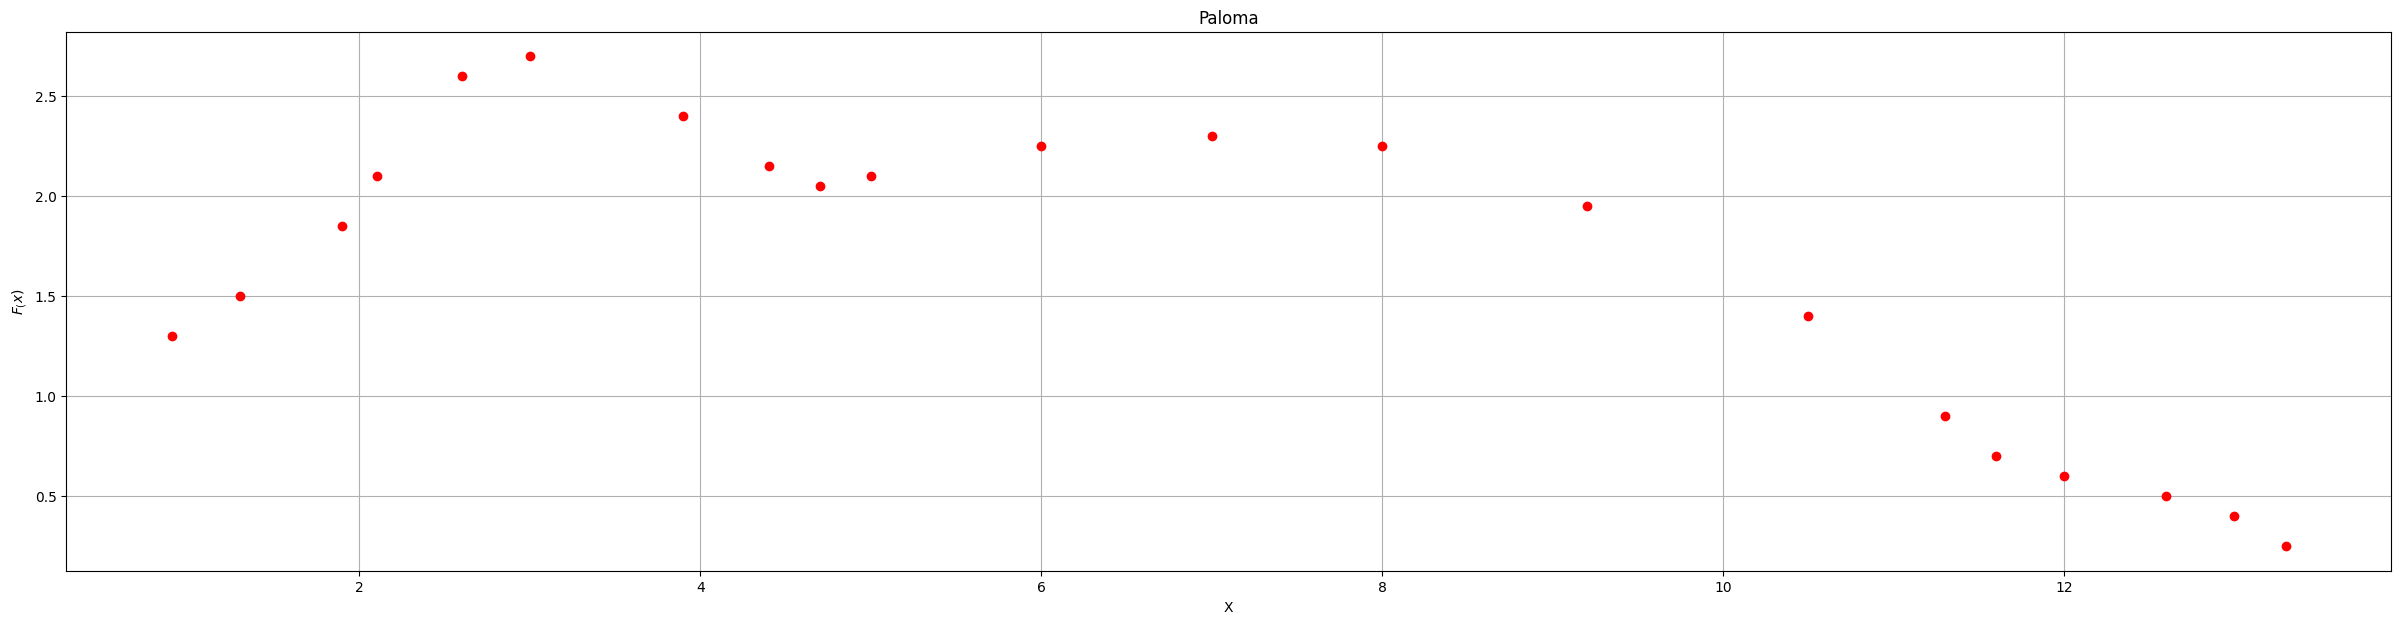

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(x,y,"ro")
plt.title("Paloma")
plt.xlabel("X")
plt.ylabel("$F_(x)$")
plt.grid()
plt.show()

In [ ]:
# polinomio de lagrange, punto 3
px = sp.interpolate.lagrange(x,y)
px

poly1d([-3.07453078e-11,  4.27948927e-09, -2.77283085e-07,  1.11075895e-05,
       -3.08159189e-04,  6.28589967e-03, -9.76903801e-02,  1.18284032e+00,
       -1.13160516e+01,  8.62513980e+01, -5.25812754e+02,  2.56420131e+03,
       -9.96897886e+03,  3.06776350e+04, -7.38665657e+04,  1.36777900e+05,
       -1.89850973e+05,  1.89994993e+05, -1.28683406e+05,  5.24625803e+04,
       -9.65278508e+03])

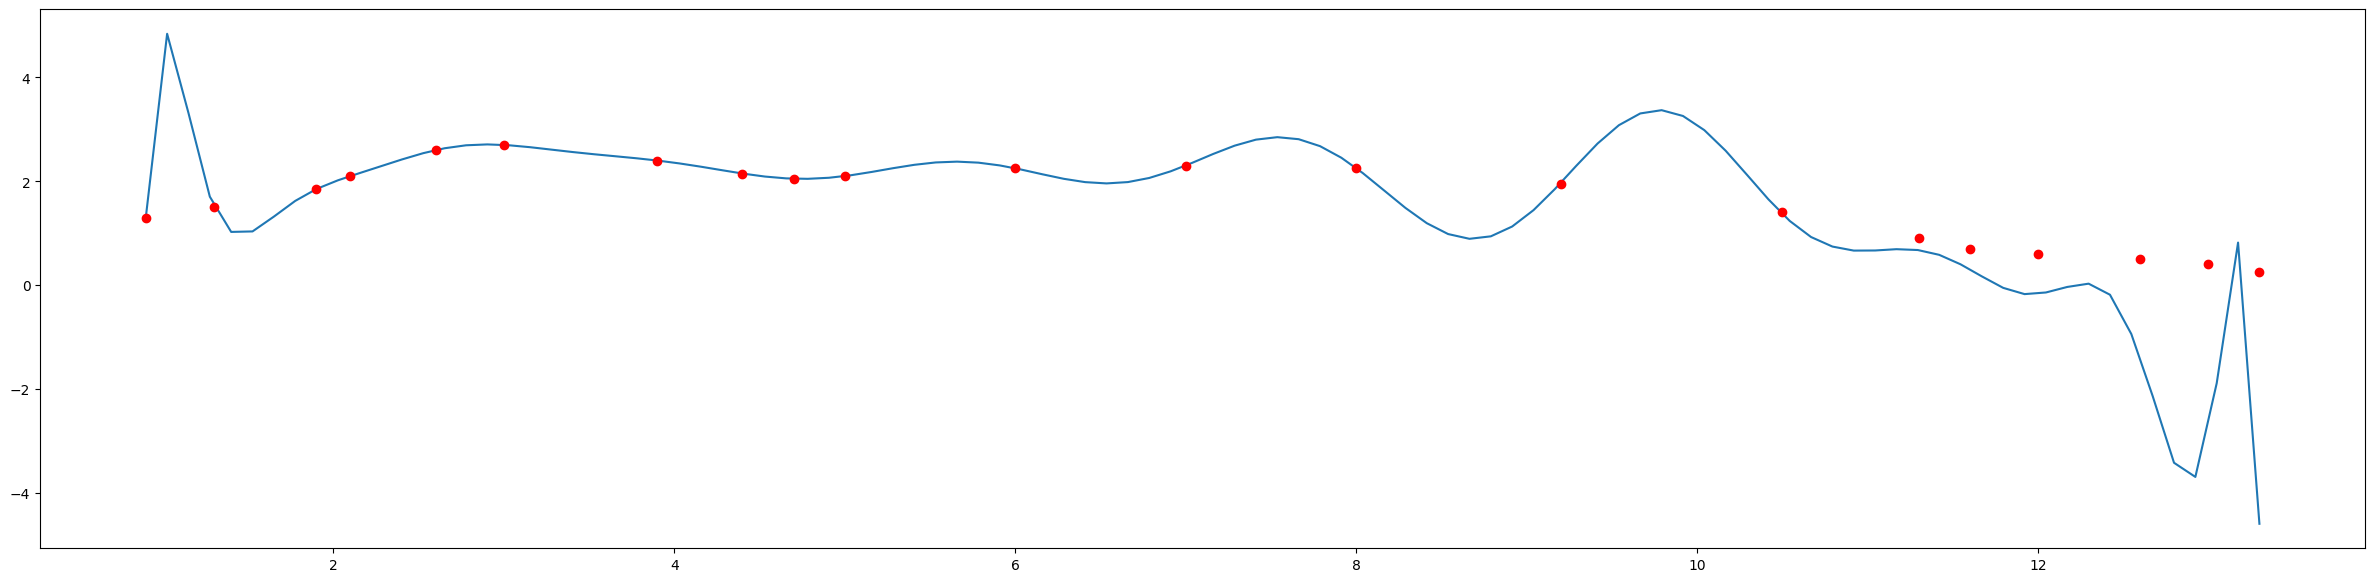

In [ ]:
x_ = np.linspace(min(x),max(x),100)
y_ = px(x_)

plt.figure(figsize=(30,7))
plt.plot(x_, px(x_))
plt.plot(x,y,"ro")

plt.show()


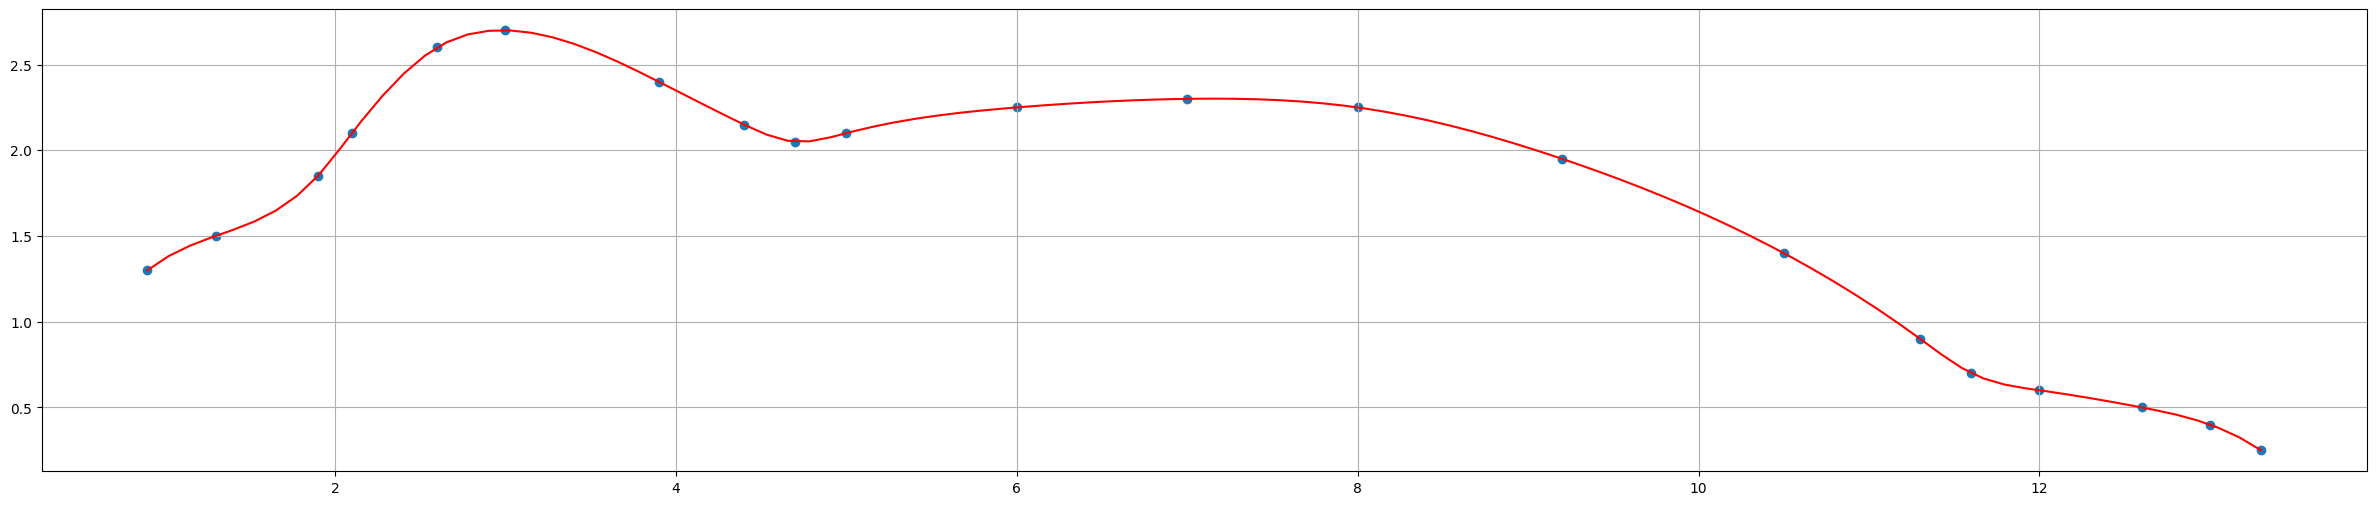

In [ ]:
#Cubic splane
cs = CubicSpline(x, y)
x_ = np.linspace(min(x), max(x), 100)
y_ = cs(x_)


plt.figure(figsize=(30, 6))
plt.scatter(x, y,)
plt.plot(x_, y_,"red")
plt.grid()
plt.show()


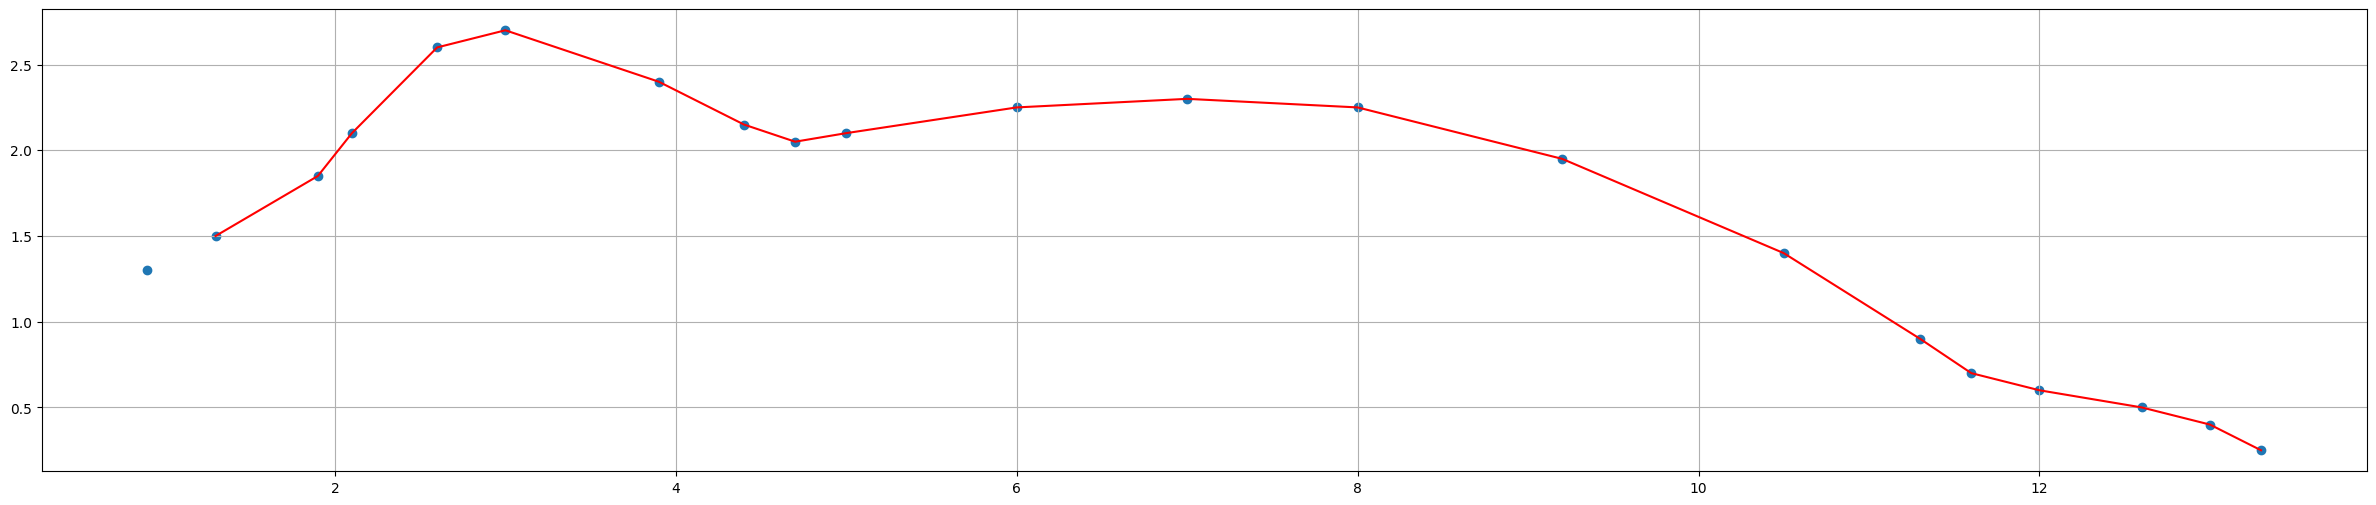

In [ ]:
# Cubic Hermite Spline

x = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

m= np.diff(y)/np.diff(x)

x_ = np.array([1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y_ = np.array([1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

ch = CubicHermiteSpline(x_,y_,m)
y__ = ch(x_)

plt.figure(figsize=(30, 6))
plt.scatter(x, y)
plt.plot(x_, y__,"red")
plt.grid()
plt.show()

